<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [2]:
# Read CSV
df = pd.read_csv("/Users/stephanienduaguba/Documents/DATA/Sacramento_transactions.csv")

In [3]:
# Shape - Number of rows and columns
df.shape

(985, 12)

In [4]:
# Head - First 5 rows of dataset
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [5]:
# Tail - Last 5 rows of dataset
df.tail()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424
984,3882 YELLOWSTONE LN,EL DORADO HILLS,95762,CA,3,2,1362,Residential,Thu May 15 00:00:00 EDT 2008,235738,38.655245,-121.075915


In [6]:
# Check non-null count and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [7]:
# Set 'zip' to string (object) as this is a categorical data
df['zip'] = df['zip'].astype(str)

In [8]:
# Recheck datatypes
df.dtypes

street        object
city          object
zip           object
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [9]:
# High level stats of the variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
beds,985.0,2.911675,1.307932,0.000000,2.000000,3.000000,4.000000,8.000000
baths,985.0,1.776650,0.895371,0.000000,1.000000,2.000000,2.000000,5.000000
sq__ft,985.0,1314.916751,853.048243,0.000000,952.000000,1304.000000,1718.000000,5822.000000
price,985.0,234144.263959,138365.839085,1551.000000,145000.000000,213750.000000,300000.000000,884790.000000
latitude,985.0,38.607732,0.145433,38.241514,38.482717,38.626582,38.695589,39.020808
longitude,985.0,-121.355982,0.138278,-121.551704,-121.446127,-121.376220,-121.295778,-120.597599


The minimum value for beds, baths and sq__ft is seen to be zero and that does not look right.

In [10]:
# Recheck missing data
df.isnull().sum().any()

False

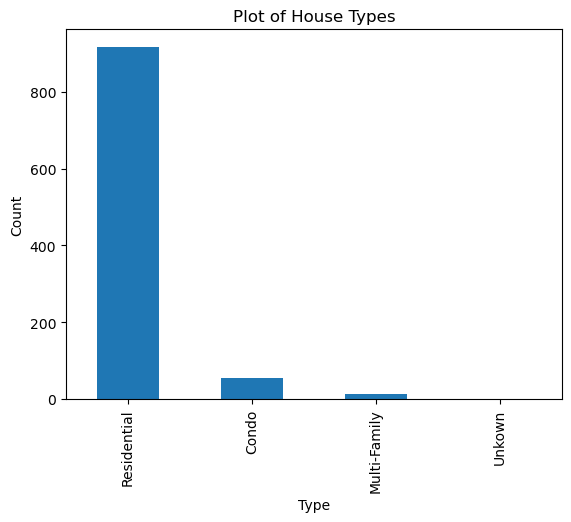

In [11]:
# Plot of unique categories of 'type'
df['type'].value_counts().plot(kind='bar')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Plot of House Types')
plt.show()

In [12]:
# Check data where 'type' equals 'Unkown'
df[df['type'] == 'Unkown']

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
757,6007 MARYBELLE LN,SHINGLE SPRINGS,95682,CA,0,0,0,Unkown,Fri May 16 00:00:00 EDT 2008,275000,38.64347,-120.888183


In [13]:
# Check zero sq__ft data
df[df['sq__ft'] == 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
...,...,...,...,...,...,...,...,...,...,...,...,...
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,188000,38.884170,-121.270222
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,200100,38.569943,-121.527539
966,9197 CORTINA CIR,ROSEVILLE,95678,CA,3,2,0,Condo,Thu May 15 00:00:00 EDT 2008,220000,38.793152,-121.290025
970,3557 SODA WAY,SACRAMENTO,95834,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,224000,38.631026,-121.501879


In [14]:
# Calculate the mean sq__ft for each type
type_mean_sqft = df.groupby('type')['sq__ft'].mean()

# Update the rows with zero sq__ft using the mean of their respective 'type'
df['sq__ft'] = df.apply(lambda row: type_mean_sqft[row['type']] if row['sq__ft'] == 0 else row['sq__ft'], axis=1)

In [15]:
df.iloc[[966, 973]]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
966,9197 CORTINA CIR,ROSEVILLE,95678,CA,3,2,760.425926,Condo,Thu May 15 00:00:00 EDT 2008,220000,38.793152,-121.290025
973,2181 WINTERHAVEN CIR,CAMERON PARK,95682,CA,3,2,1338.625954,Residential,Thu May 15 00:00:00 EDT 2008,224500,38.697570,-120.995739


In [16]:
# Drop 'Unkown' type
df = df[df['type'] != 'Unkown']
df

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836.0,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167.0,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796.0,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852.0,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797.0,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280.0,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477.0,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216.0,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685.0,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424


In [17]:
# Check zero beds data
df[df['beds'] == 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,1338.625954,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,1338.625954,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,1338.625954,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,1338.625954,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,1338.625954,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
...,...,...,...,...,...,...,...,...,...,...,...,...
901,1530 TOPANGA LN Unit 204,LINCOLN,95648,CA,0,0,760.425926,Condo,Thu May 15 00:00:00 EDT 2008,138000,38.884150,-121.270277
917,501 POPLAR AVE,WEST SACRAMENTO,95691,CA,0,0,1338.625954,Residential,Thu May 15 00:00:00 EDT 2008,165000,38.584526,-121.534609
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,760.425926,Condo,Thu May 15 00:00:00 EDT 2008,188000,38.884170,-121.270222
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,1338.625954,Residential,Thu May 15 00:00:00 EDT 2008,200100,38.569943,-121.527539


In [18]:
# Check zero baths data
df[df['baths'] == 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,1338.625954,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,1338.625954,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,1338.625954,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,1338.625954,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,1338.625954,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
...,...,...,...,...,...,...,...,...,...,...,...,...
901,1530 TOPANGA LN Unit 204,LINCOLN,95648,CA,0,0,760.425926,Condo,Thu May 15 00:00:00 EDT 2008,138000,38.884150,-121.270277
917,501 POPLAR AVE,WEST SACRAMENTO,95691,CA,0,0,1338.625954,Residential,Thu May 15 00:00:00 EDT 2008,165000,38.584526,-121.534609
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,760.425926,Condo,Thu May 15 00:00:00 EDT 2008,188000,38.884170,-121.270222
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,1338.625954,Residential,Thu May 15 00:00:00 EDT 2008,200100,38.569943,-121.527539


In [19]:
# Recheck count of 'type' categories
df['type'].value_counts()

Residential     917
Condo            54
Multi-Family     13
Name: type, dtype: int64

In [20]:
# Check unique categories of 'state'
df['state'].unique()

array(['CA'], dtype=object)

Given California is the only state in this dataset, the 'state' variable will not be considered in the model.

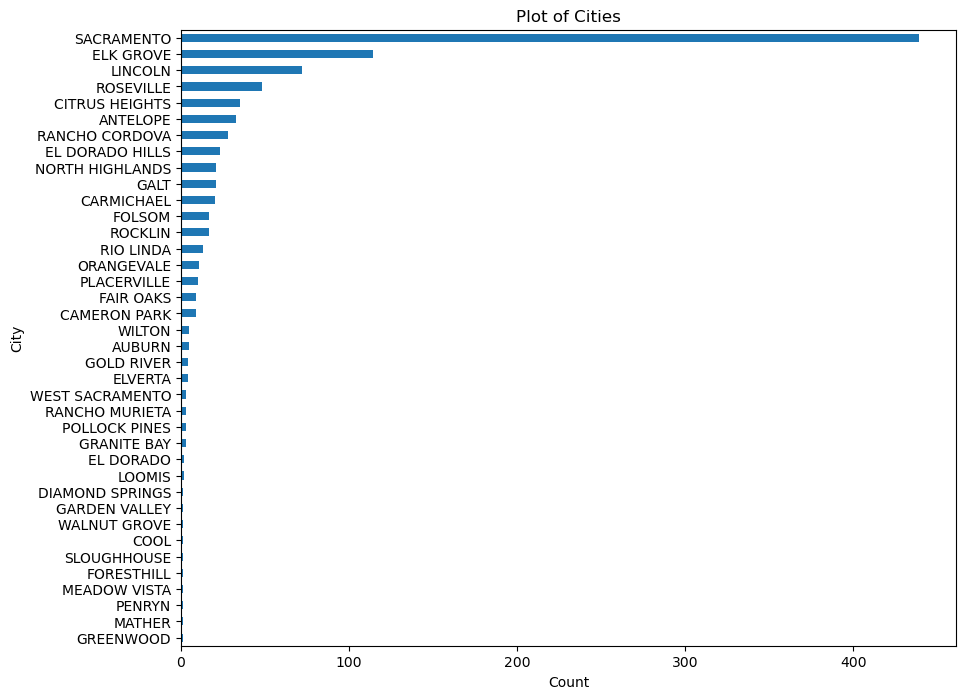

In [21]:
# Check unique categories of 'city'
df['city'].value_counts().sort_values().plot(kind='barh', figsize=(10, 8))
plt.xlabel('Count')
plt.ylabel('City')
plt.title('Plot of Cities')
plt.show()

In [22]:
# Create an interactive map
# Import the necessary libraries
import folium
import pandas as pd

# To use Mapbox tiles in a Folium map, you need to specify your Mapbox access token and use the Mapbox tileset as the tiles parameter.

# Create a Folium map
m = folium.Map(
    location=[38.575764, -121.478851], # Set the initial map center coordinates
    tiles="OpenStreetMap",  # Specify the map tiles (you can replace this with your Mapbox style URL)
    zoom_start=10 # Set the initial zoom level
)

# Add markers to the map based on latitude and longitude coordinates from the DataFrame
for i in range(0, len(df.head(1000))):
    folium.Marker(
        location=[df.iloc[i]['latitude'], df.iloc[i]['longitude']]
    ).add_to(m)

display(m)

In [23]:
# List of columns headers
df.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude'],
      dtype='object')

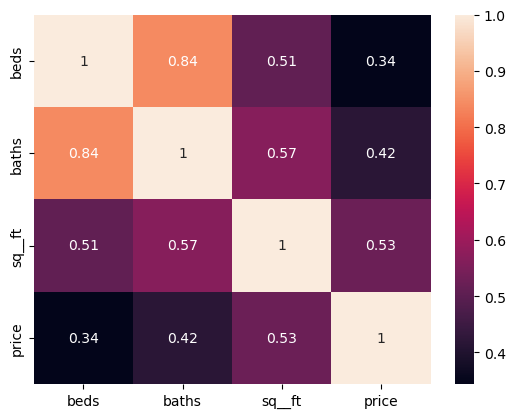

In [24]:
# Correlation matrix
numeric_columns = ['beds', 'baths', 'sq__ft', 'price']
corr = df[numeric_columns].corr()

# Heatmap showing correlation
sns.heatmap(corr, annot=True)
plt.show()

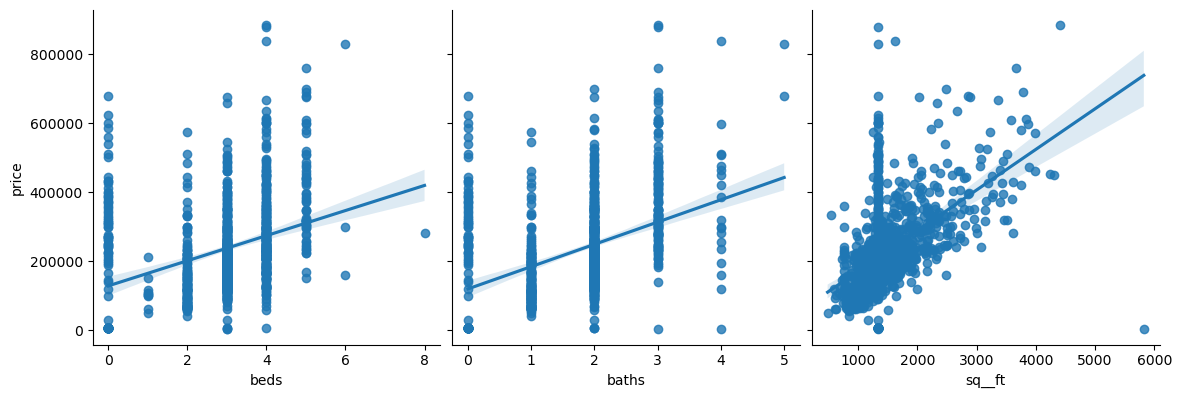

In [25]:
# Pairplot of numerical independent variables with price
sns.pairplot(df, y_vars='price', x_vars=['beds', 'baths', 'sq__ft'], kind='reg', height=4);

The price tends to increase as the number of beds, baths, and square footage increases, indicating a positive correlation.

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

ANSWER:

Price is the target variable - the 'price' aligns with the predictive objective of the model and would also be the most relevant feature to answer a business question.

#### 2.2 List all possible variables which might be Predictor variable.

ANSWER:

Possible predictor variables include: 'beds', 'baths', 'sq__ft', 'type'

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [26]:
# Target variable
y = df['price']
# Predictor variables
# X = df[['sq__ft', 'type']]

In [27]:
# Function to visualize distribution of numerical variables and correlation to 'price'
def draw_scatter_plot(data, x_col, y_col):
        
    # Extract the specified columns
    x_data = data[x_col]
    y_data = data[y_col]

    # Generate the title based on column names
    title = f"Scatter plot of {x_col} vs {y_col}"

    # Create a scatter plot with hue
    sns.scatterplot(x=x_col, y=y_col, data=data, hue=data['type'])
    
    # Set the title
    plt.title(title)
    
    # Add a grid
    plt.grid(True)
    
    # Add legend and set position
    legend = plt.legend(title="Type")
    legend.set_bbox_to_anchor((1.3, 1.02))
    
    plt.show()

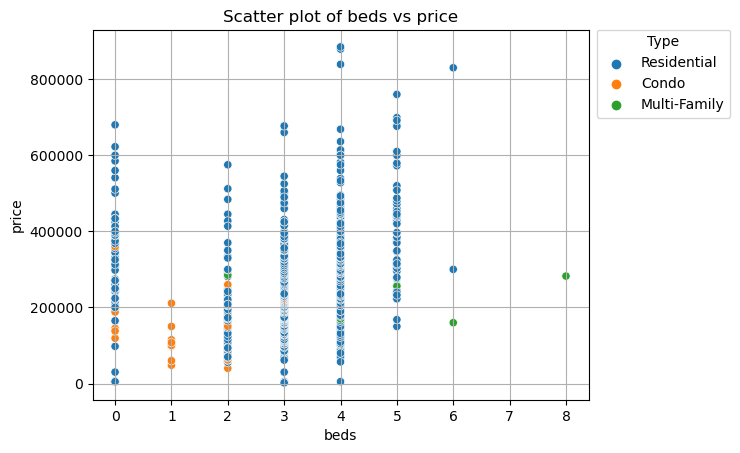

In [28]:
# Scatter plot of beds vs price
draw_scatter_plot(df, 'beds', 'price')

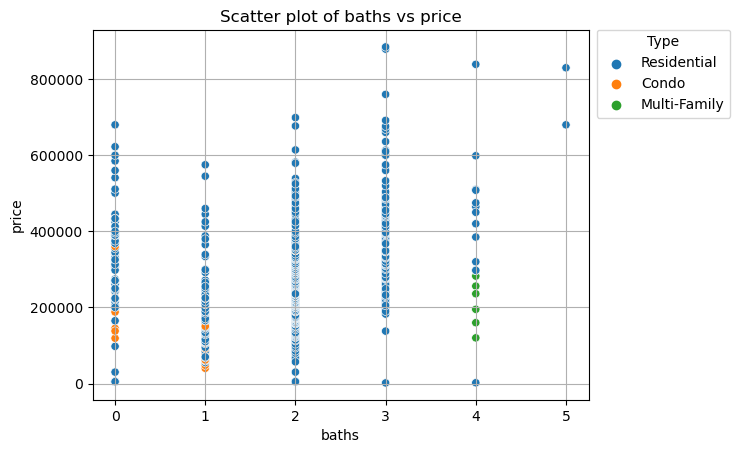

In [29]:
# Scatter plot of baths vs price
draw_scatter_plot(df, 'baths', 'price')

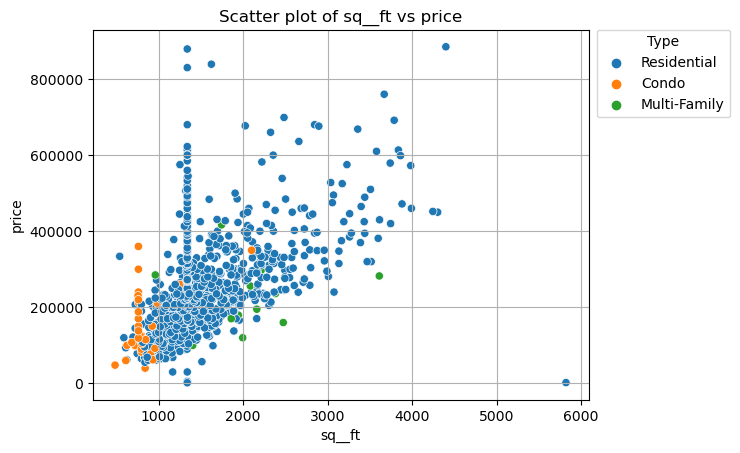

In [30]:
# Scatter plot of sq__ft vs price
draw_scatter_plot(df, 'sq__ft', 'price')

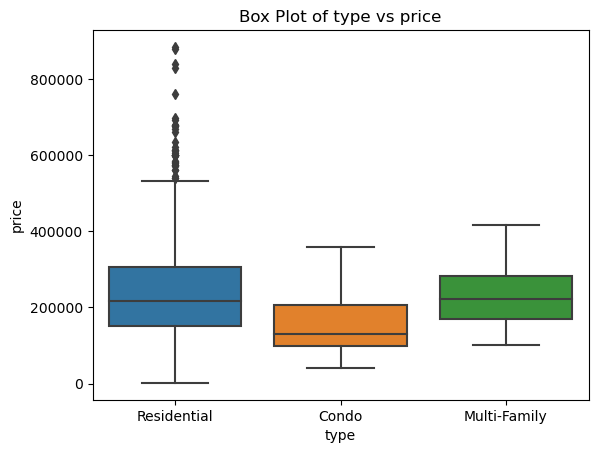

In [31]:
# Boxplot of categorical variable
sns.boxplot(x="type", y="price", data=df)

# Add labels and a title
plt.xlabel("type")
plt.ylabel("price")
plt.title("Box Plot of type vs price")

# Show the plot
plt.show()

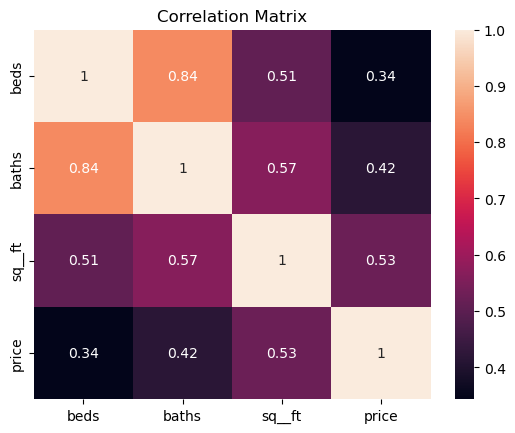

In [32]:
# Correlation matrix
# Define the columns to exclude
excluded_columns = ['latitude', 'longitude'] 

# Drop the 'latitude' and 'longitude' from the filtered data
filtered_data = df.drop(columns=excluded_columns)

# Calculate the correlation matrix
correlation_matrix = filtered_data.corr(numeric_only=True)

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True)
plt.title(f'Correlation Matrix')

# Show the plot
plt.show()

ANSWER - Best predictor? Why? Reason?

Square footage (sq__ft) is the best predictor because it impacts all types of properties and also displays the highest correlation with price.

#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [33]:
# ANSWER
# Simplest way to predict the price is using the mean
# Mean of price
df['y_hat'] = df['price'].mean()

In [34]:
X = df['sq__ft']
y = df['price']
yhat = df['y_hat'] #'y_hat' - an estimated value for 'price', in this case, based on mean

In [35]:
# Function to plot the data with the mean value
def draw_plot(X, y, yhat):
    # Create a figure
    fig = plt.figure(figsize=(10,8))
    # Get the axis of that figure
    ax = plt.gca()
    
    # Plot a scatter plot of it with our data
    ax.scatter(X, y, c='b')
    ax.plot(X, yhat, color='r')
    
    plt.show

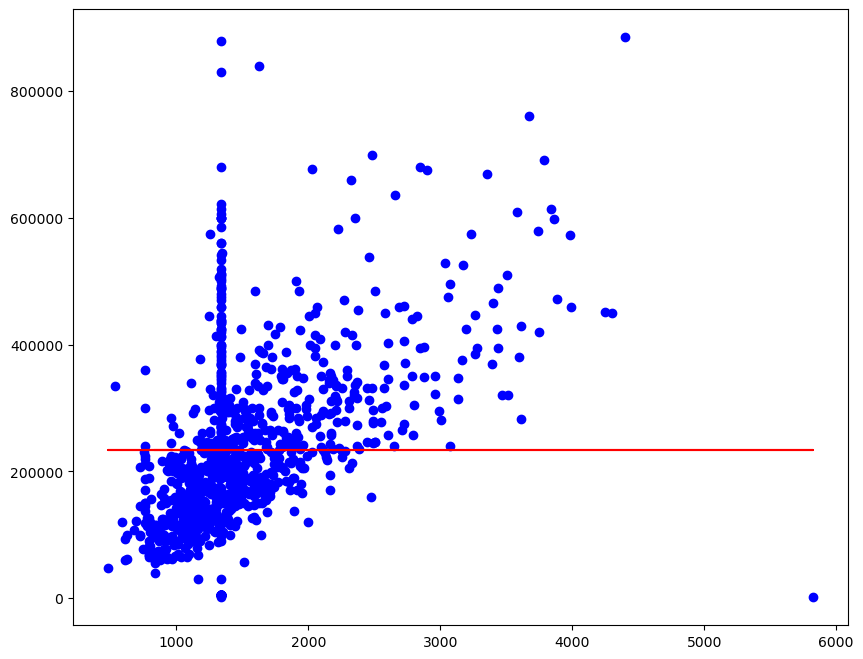

In [36]:
# Plot showing mean as the predicted line
draw_plot(X, y, yhat)

#### 2.5 Find Residuals

Find difference between actual value and predicted value. Use absolute value.

In [37]:
# ANSWER
# Mean Absolute Error (residuals)
res = abs(df['price'] - df['y_hat']).mean()
res

103508.86382113822

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, y

- X = Predictor Variable
- y = Target Variable

In [38]:
# ANSWER
# Assigning predictor and target variables
X = df['sq__ft']
y = df['price']

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [39]:
# ANSWER
# Function to calculate beta_1
def calculate_beta_1(X, y):
    # Calculate the mean of X and y
    xbar = X.mean()
    ybar = y.mean()
    
    # Calculate the numerator of the beta_1 formula
    n = np.sum((y - ybar) * (X - xbar))
    
    # Calculate the denominator of the beta_1 formula
    d = np.sum(np.square(X - xbar))
    
    # Calculate the beta_1 coefficient
    beta_1 = n / d
    
    return beta_1

In [40]:
# Calculate beta_1
beta_1 = calculate_beta_1(X, y)
beta_1

117.88919572090055

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [41]:
# ANSWER
# Function to calculate beta_0
def calculate_beta_0(X, y):
    # Calculate the mean of X and y
    xbar = X.mean()
    ybar = y.mean()
    
    # Calculate beta_1 using the provided function
    beta_1 = calculate_beta_1(X, y)
    
    # Calculate beta_0 using the formula: beta_0 = ybar - beta_1 * xbar
    beta_0 = ybar - beta_1 * xbar
    
    return beta_0

In [42]:
# Calculate beta_0
beta_0 = calculate_beta_0(X, y)
beta_0

52498.15046064745

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [43]:
# ANSWER
# Function to calculate yhat (estimated value for price)
def calculate_yhat(X, b0, b1):
    return b0 + b1 * X

In [44]:
# Calculate Yhat
yhat = calculate_yhat(X, beta_0, beta_1)
yhat

0      151053.518083
1      190074.841867
2      146337.950254
3      152939.745215
4      146455.839450
           ...      
980    321285.516704
981    226620.492540
982    195851.412457
983    251141.445250
984    213063.235033
Name: sq__ft, Length: 984, dtype: float64

##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [45]:
# ANSWER
# Function to calculate residuals
def calculate_residual(y, yhat):
    res = y - yhat
    return res

In [46]:
# Calculate absolute value for residuals
resi = calculate_residual(y, yhat)
abs(resi)

0       91831.518083
1      121862.841867
2       77457.950254
3       83632.745215
4       64555.839450
           ...      
980     88860.516704
981      7379.507460
982     39148.587543
983     15840.445250
984     22674.764967
Length: 984, dtype: float64

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [47]:
# ANSWER
# Function to calculate total sum of squares
def calculate_total_sum_of_square(y):
    # Calculate the mean of y
    ybar = np.mean(y)
    
    # Calculate the squared differences from the mean
    SStot = np.square(y - ybar)
    
    # Total sum of the squared differences
    SStot = np.sum(SStot)
    
    return SStot

In [48]:
calculate_total_sum_of_square(y)

18837112851365.465

In [49]:
# ANSWER
# Function to calculate residual sum of squares
def calculate_residual_sum_of_square(y, yhat):
    
    # Calculate the squared differences from yhat
    SSres = np.square(y - yhat)
    
    SSres = np.sum(SSres)
    
    return SSres

In [50]:
calculate_residual_sum_of_square(y, yhat)

13637826247613.352

In [51]:
# ANSWER
# Function to calculate r_square
def calculate_r_square(y, yhat):
    SStot = calculate_total_sum_of_square(y)
    SSres = calculate_residual_sum_of_square(y, yhat)
    Rsquare = 1 - (SSres/SStot)
    return Rsquare

In [52]:
calculate_r_square(y, yhat)

0.2760129243147379

##### 2.7.F [BONUS] Draw Plot of Predicted Line

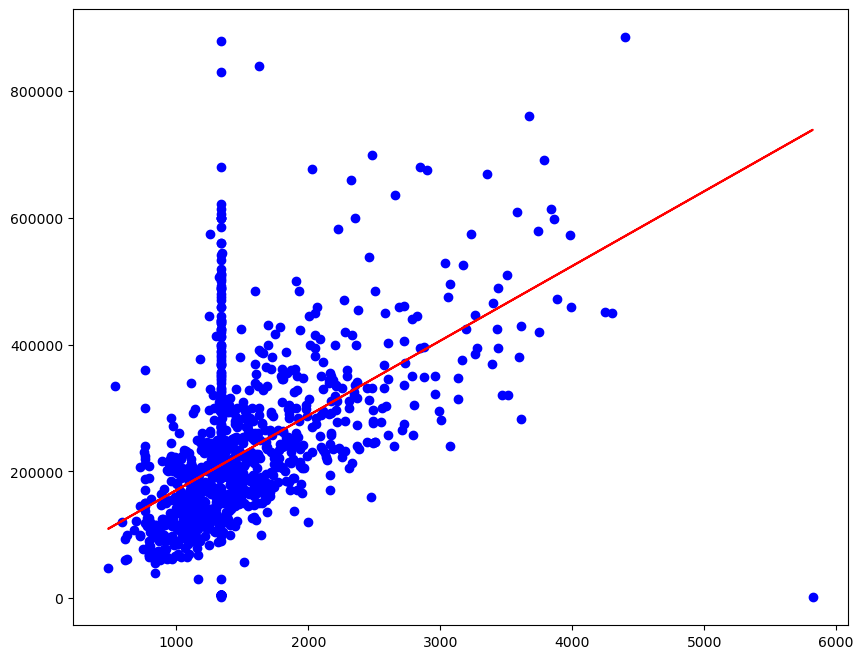

In [53]:
# ANSWER
# Plot showing the predicted line
draw_plot(X, y, yhat)

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Residuals

In [54]:
# ANSWER
df['yhat'] = yhat

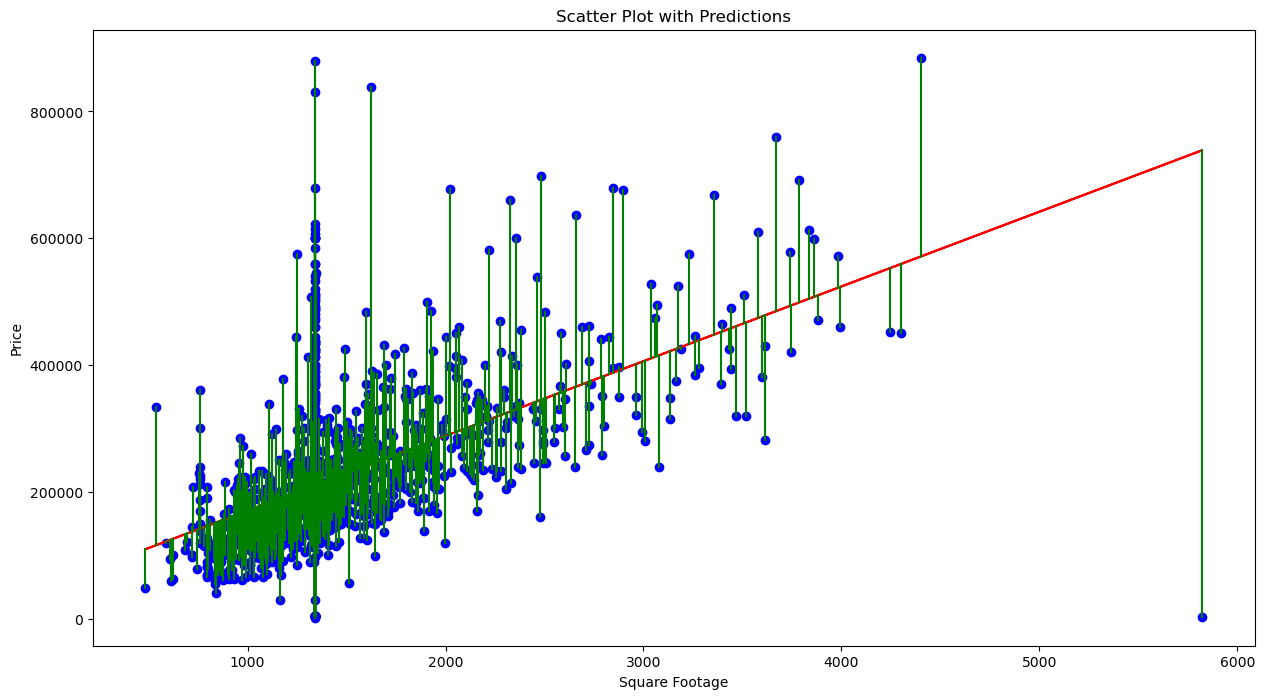

In [55]:
# Create figure size
fig = plt.figure(figsize=(15, 8))

# Get the axis
ax = fig.gca()

# Scatter plot for the data points
ax.scatter(x=X, y=y, c='b')

# Line plot for predictions
ax.plot(X, yhat, color='r')

# Iterate over predictions
for _, row in df.iterrows():    
    # Plot a line segment from (row['sq__ft'], row['price']) to (row['sq__ft'], row['yhat']) in green
    plt.plot([row['sq__ft'], row['sq__ft']], [row['price'], row['yhat']], 'g-')

# Add labels and title
ax.set_xlabel('Square Footage')
ax.set_ylabel('Price')
ax.set_title('Scatter Plot with Predictions')

# Show the plot
plt.show()

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [56]:
# ANSWER
Xpred = 1204
Xpred

1204

In [57]:
beta_0

52498.15046064745

In [58]:
beta_1

117.88919572090055

In [59]:
ypred = beta_1 * Xpred + beta_0
ypred 

194436.7421086117



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



